In [10]:
import tensorflow as tf # load tensorflow library
import numpy as np
import cv2 # opencv to open image files
import matplotlib.pyplot as plt # library for visualization of image
from tensorflow.keras.layers import Input, Dense, Flatten # layers for neural network definition
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

**1. Prepare the MNIST dataset**

In [11]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

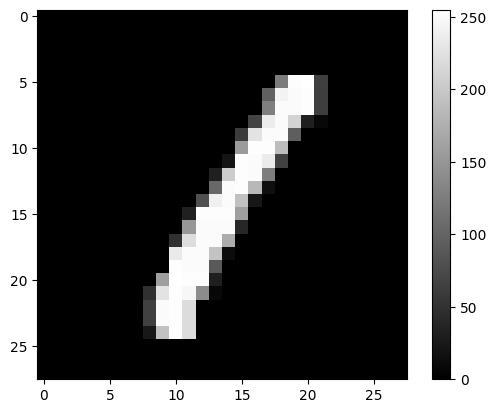

In [12]:
# Draw an image
plt.imshow(x_train[3], cmap='gray')
plt.colorbar()

**Data normalization**

In [13]:
# Cast uint8 to float32 and make a normalization
x_train = np.float32(x_train) / 255.0
x_valid = np.float32(x_valid) / 255.0

In [14]:
# Transformation from NumPy format to tf.Tensor format using tf.data API
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # make pairs of x and y (label)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

AUTOTUNE = tf.data.experimental.AUTOTUNE # Optimization for making a mini-batch
train_ds = train_ds.shuffle(len(x_train)) # Shuffle training dataset
train_ds = train_ds.repeat(1) # How many repeats of times of datasets on ONE epoch
train_ds = train_ds.batch(50) # Make a mini-batch with mini-batch size 50
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.batch(50) # for validation data

In [15]:
# check the dataset (tf.Tensor format)
next(iter(train_ds))

(<tf.Tensor: shape=(50, 28, 28), dtype=float32, numpy=
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ...

**2. Design of model**

In [24]:
# Model design using functional API
input = Input(shape=(28, 28), name='input') # Definition of the input layer
h = Flatten()(input) # Convert 28x28 image (2d Tensor) to 1 dim. Tensor data (784 dims.)
h = Dense(512, activation='relu', name='dense1')(h)
h = Dense(512, activation='sigmoid', name='dense3')(h)
h = Dense(512, activation='relu', name='dense2')(h)  # if you want to increase one more layer
output = Dense(10, activation='softmax', name='output')(h) # output layer

model = Model(inputs=input, outputs=output) # Make a model
model.summary() # Visualize the model

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 512)               401920    
                                                                 
 dense3 (Dense)              (None, 512)               262656    
                                                                 
 dense2 (Dense)              (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.

**3. Set a loss function and optimizer**

In [25]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics='accuracy')

**4. Training**

In [26]:
model.fit(train_ds, epochs=10, validation_data=valid_ds) # 10 epoch enogh to train the model

Epoch 1/10
1200/1200 [==============================] - 12s 10ms/step - loss: 0.2378 - accuracy: 0.9257 - val_loss: 0.1168 - val_accuracy: 0.9638
Epoch 2/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0898 - accuracy: 0.9718 - val_loss: 0.0808 - val_accuracy: 0.9732
Epoch 3/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.0836 - val_accuracy: 0.9739
Epoch 4/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0920 - val_accuracy: 0.9759
Epoch 5/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0781 - val_accuracy: 0.9761
Epoch 6/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0709 - val_accuracy: 0.9809
Epoch 7/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.0892 - val_a

**5. Recognize your own number character**

---


1. Write your favarite number
2. Crop the number character from the image
3. Save
4. Uploat to Colab.

In [19]:
model.save('MNIST_DNN.keras') # Save the model (indicate your favarite folder)

[[245 245 245 ... 245 245 245]
 [245 245 245 ... 245 245 245]
 [245 245 245 ... 245 245 245]
 ...
 [245 245 245 ... 245 245 245]
 [245 245 245 ... 245 245 245]
 [245 245 245 ... 245 245 245]]


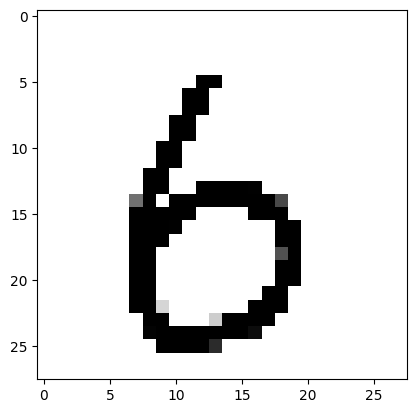

In [27]:
img = cv2.imread('6.PNG', cv2.IMREAD_GRAYSCALE)
print(img)
plt.imshow(img, cmap='gray')
img = cv2.resize(img, (28, 28))
plt.imshow(img, cmap='gray')

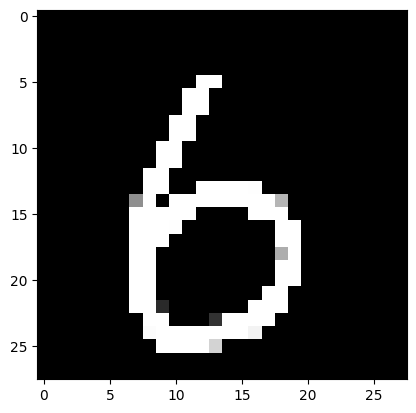

In [28]:
img = 255 - img
plt.imshow(img, cmap='gray')

In [29]:
img = np.float32(img) / 255. # Normazaition
print('Befor:', img.shape)
img = img[np.newaxis, :] # Add a new dimension because the NN model can only accept the data which shape is (batch, 28, 28).
print('After:', img.shape)
pred = model.predict(img) # inference
print(pred)
print('Result:', pred.argmax())

Befor: (28, 28)
After: (1, 28, 28)
1/1 [==============================] - 0s 53ms/step
[[7.16680603e-04 1.51354925e-05 1.46550485e-06 2.38622579e-05
  2.70341425e-05 5.21024689e-03 9.91343737e-01 8.59907558e-08
  2.65377155e-03 8.02477280e-06]]
Result: 6
